In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import networkx as nx
import pandas as pd

In [2]:
def dataGraph(path):
    edgeGraph = nx.read_edgelist(path)
    return edgeGraph

In [3]:
actors = 'actor-movie.dat'
actors_graph = dataGraph(actors)
type(actors_graph)
print("Converted graph's file type is:", type(actors_graph))

Converted graph's file type is: <class 'networkx.classes.graph.Graph'>


In [4]:
print(nx.info(actors_graph))

Name: 
Type: Graph
Number of nodes: 383640
Number of edges: 1470351
Average degree:   7.6653


In [5]:
#print("Diameter of the Graph Network:", nx.diameter(actors_graph))

In [6]:
nx.number_of_edges(actors_graph)

1470351

In [7]:
pdEdgeList = pd.read_csv(actors, sep = " ", header = None)
pdEdgeList.head(5)

,0,1,2
0,1,1,NaN
1,2,1,NaN
2,2,2,NaN
3,3,1,NaN
4,3,3,NaN


In [8]:
gpd = nx.Graph()

for i, elrow in pdEdgeList.iterrows():
    gpd.add_edge(elrow[0], elrow[1])

In [9]:
def calculate_degree(G, n = 0):
    fmdegree = []
    fmNode = []
    for node in G.nodes():
        tempD = G.degree(node)
        if tempD >= n: fmdegree.append(tempD), fmNode.append(node)
    return fmdegree, fmNode

In [10]:
gpdDegree, gpdNode = calculate_degree(gpd,0)

In [11]:
max(gpdDegree)

655

In [12]:
min(gpdDegree)

1

In [13]:
data = {'Node': gpdNode,
        'Degree': gpdDegree}
df_NodeDegree = pd.DataFrame(data)
df_NodeDegree.head()

,Node,Degree
0,1.0,10
1,2.0,3
2,3.0,79
3,4.0,24
4,5.0,11


In [14]:
df_NodeDegree.Degree.size

383640

In [15]:
gpd[1]

AtlasView({1.0: {}, 2.0: {}, 3.0: {}, 4.0: {}, 5.0: {}, 10569.0: {}, 10858.0: {}, 25115.0: {}, 124568.0: {}})

In [17]:
#nx.draw(gpd)
#plt.show()

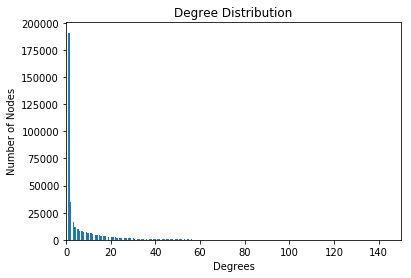

In [26]:
plt.figure()
plt.hist(df_NodeDegree['Degree'],1000)
plt.xlim(0,150)
plt.xlabel("Degrees")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution")
plt.show()

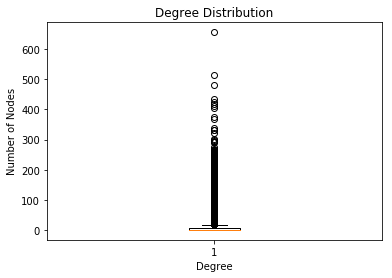

In [28]:
plt.boxplot(df_NodeDegree['Degree'])
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution")
plt.show()

In [30]:
print(nx.info(gpd))

Name: 
Type: Graph
Number of nodes: 383640
Number of edges: 1470351
Average degree:   7.6653


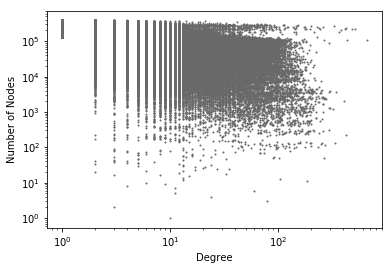

In [52]:
plt.figure()
plt.loglog(df_NodeDegree['Degree'], df_NodeDegree['Node'],'ro',
           color = 'dimgrey', linewidth=1, markersize=1)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.show()